# Demonstrate  the mean  adapted  GMM for  an arbitrary  set  of  data
Find the % of  unadapted  Gaussians in the  class  dependent  model  compared  with the  class independent  UBM 


In [5]:
#Import recommonended libraries

from GMM1 import GaussianMixture
import copy
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from pandas import DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import glob
import sys

import warnings
warnings.filterwarnings('ignore')



In [42]:
class train_GMM:
    def returnGMM(features, NUMBER_OF_GAUSSIAN):
        X=features
        model=GaussianMixture(gaussians=K, n_iters = 50, tol = 0, seed = 4)
        fitted_values = model.fit(X)
        mean,weight,covar,probability = model.fit(X)
        return mean,weight,covar,probability
    
class opt:
    def normalize_meanvector(weight, var, mean_vec):
        normalize_mean = np.zeros(np.shape(mean_vec), dtype=np.float32)
        [NUMBER_OF_GAUSSIAN, FEATURE_ORDER] = np.shape(mean_vec)
        for ii in range(0, NUMBER_OF_GAUSSIAN):
            normalize_mean[ii, :] = np.sqrt(weight[ii]) * \
                            (1 / np.sqrt(var[ii, :])) * mean_vec[ii, :]
        return normalize_mean

2


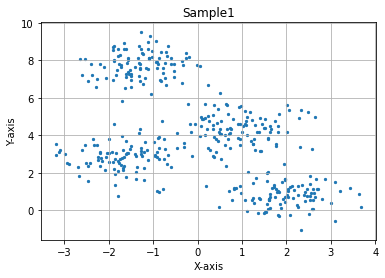

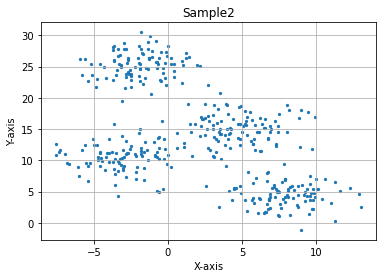

In [39]:
K=4
NUMBER_OF_SAMPLE = 500
from sklearn.datasets.samples_generator import make_blobs
Data, y_true = make_blobs(n_samples=400, centers=K,
                       cluster_std=0.70, random_state=0)
# ===========================
# parameters    
# ===========================
df = pd.DataFrame(data=Data, columns=["X", "Y"])

FEATURE_ORDER = Data.shape[1]
print(FEATURE_ORDER)
NUMBER_OF_GAUSSIAN = K
RAND_VAL = 3
RAND_MEAN = 2
SCALING_FACTOR = 0.01


sample1 = Data

sample2 = Data * RAND_VAL + RAND_MEAN


#Plot 2D

plt.scatter(sample1[:, 0], sample1[:, 1], s=5)
plt.title("Sample1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()


plt.scatter(sample2[:, 0], sample2[:, 1], s=5)
plt.title("Sample2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()



In [43]:
# training init GMM to create UBM
GMM_train_by_sample1 = train_GMM.returnGMM(sample1, NUMBER_OF_GAUSSIAN) 

print(prob)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Chosen: [184   6  61 312]
Initial Means: [[-1.66871607  8.92203024]
 [ 2.25121474  0.82895839]
 [ 2.8032241   0.5802936 ]
 [-0.67938395  8.24654158]]
Initial weights: [0.25 0.25 0.25 0.25]
Initial Covariance: [[[ 2.70903967 -2.17198707]
  [-2.17198707  6.88631573]]

 [[ 2.70903967 -2.17198707]
  [-2.17198707  6.88631573]]

 [[ 2.70903967 -2.17198707]
  [-2.17198707  6.88631573]]

 [[ 2.70903967 -2.17198707]
  [-2.17198707  6.88631573]]]
Iteration: 0
prior_weight 0.25
Likelihood/probability0 [1.64852903e-02 1.47363961e-04 2.46255353e-04 7.56668689e-03
 1.57525946e-04 3.68954384e-02 2.31094257e-04 8.18638029e-03
 1.26774948e-03 5.09383808e-04 3.73462871e-02 8.42327569e-05
 9.56721331e-04 9.47791289e-04 2.67278326e-03 9.60864224e-05
 1.34289714e-04 1.87581349e-04 4.20450805e-03 4.04140004e-03
 4.42005937e-03 5.21094573e-04 2.57504578e-02 7.18331494e-03
 9.16157424e-03 2.27530085e-02 3.11205017e

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

##Posterior Probability of Noisy Dataset :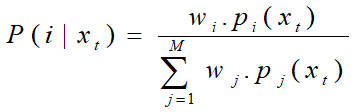

In [ ]:
# Posterior probabilities for K NUMBER_OF_GAUSSIAN
probability = GMM_train_by_sample1.prob(sample1)
label_values_1 =GMM_train_by_sample1.predict(sample1)
#print(label_values_1)
probability_2=GMM_train_by_sample1.predict_proba(sample2)
label_values_2 =GMM_train_by_sample1.predict(sample2)
print("Sample1",probability)

print("Sample2",probability_2)

def accuracy(label_values_1,label_values_2):
    return(label_values_1==label_values_2).mean()
print(accuracy(label_values_1,label_values_2)*100)

ni: 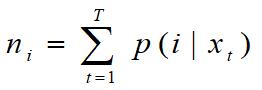

In [ ]:
#N summation for K NUMBER_OF_GAUSSIAN
n_i = np.sum(probability_2, axis=0)
print(n_i)

Mean of Posterior Probaility on Noisy Image: 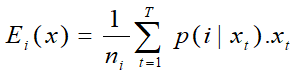

In [ ]:

E = np.zeros((FEATURE_ORDER, NUMBER_OF_GAUSSIAN), dtype=np.float32)
print('Size of E', E.shape)

for ii in range(0, NUMBER_OF_GAUSSIAN):
    probability_gauss = np.tile(probability_2[:, ii],(FEATURE_ORDER, 1)).T * sample2
    E[:, ii] = np.sum(probability_gauss, axis=0) / n_i[ii]

print('probability_gauss: ', probability_gauss.shape)
print('Size of E', E.shape)

Data dependent adaptation coefficient: 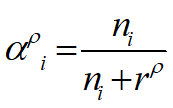

In [ ]:
alpha = n_i / (n_i + SCALING_FACTOR)
print('alpha: ', alpha)

In [ ]:
old_mean = copy.deepcopy(GMM_train_by_sample1.means_)
print('old_mean: ', old_mean )
new_mean = np.zeros((NUMBER_OF_GAUSSIAN, FEATURE_ORDER), dtype=np.float32)
print('new mean: ', new_mean )

Sufficient statistics Mean Updation: 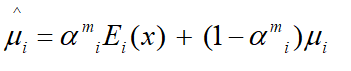

In [ ]:
# //Computing the new parameters for sample2
for ii in range(0, NUMBER_OF_GAUSSIAN):
    new_mean[ii,:] = (alpha[ii] * E[:,ii]) + ((1 - alpha[ii]) * old_mean[ii, :])
print('new mean: ', new_mean )

In [ ]:
# Fetching the other parameters (weights,covariance) from UBM model
weight = GMM_train_by_sample1.weights_
var = GMM_train_by_sample1.covariances_
print('weight: ', weight )
print('var: ', var )

In [ ]:
# get GMM supervector
norm_mean = opt.normalize_meanvector(weight, var, new_mean)
super_vector = np.reshape(norm_mean, NUMBER_OF_GAUSSIAN * FEATURE_ORDER
                          
print('norm_mean: ', norm_mean )
print('super_vector: ', super_vector)


####For plotting graph
norm_mean_old = opt.normalize_meanvector(weight, var,old_mean)
super_vector_old = np.reshape(norm_mean_old, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)
print('norm_mean_old: ', norm_mean_old )
print('super_vector_old: ', super_vector_old )

In [ ]:
plt.figure()
plt.plot(super_vector / np.sum(np.abs(super_vector)))
plt.plot(super_vector_old / np.sum(np.abs(super_vector_old)), 'r')
plt.legend(['adapted GMM supervector', 'original supervector'])

In [ ]:
# ===========================
#Verification
# ===========================
sample2_many = sample2

testGMM_many = train_GMM.returnGMM(sample2_many, NUMBER_OF_GAUSSIAN) 
testGMM_many_mean = testGMM_many.means_
print('testGMM_many_mean', testGMM_many_mean)

plt.figure()
plt.plot(old_mean[:, 0], old_mean[:, 1], 'bo')
plt.plot(new_mean[:, 0], new_mean[:, 1], 'ro')
plt.plot(testGMM_many_mean[:, 0], testGMM_many_mean[:, 1], 'ko')
plt.legend(['before adapted ', 'after adapted', 'true'])
plt.grid(True)
#plt.xlim(-15,15)
#plt.ylim(-50,50)
plt.show()